In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifierCV
from xgboost import XGBClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as Xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.svm import NuSVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import PassiveAggressiveClassifier


from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix,precision_score,recall_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Default theme
sns.set_theme(palette='tab10',
              font='Comic Sans MS',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')
plt.rcParams["axes.grid"] = False

In [3]:
df = pd.read_csv("Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
#df=df1.drop(['Unnamed: 0'], axis=1)
#df.head()

In [5]:
# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
categ = df.select_dtypes(include = "object").columns

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


In [6]:
df.to_csv('Steel_dataset.csv')

In [7]:
# Split the dataset and prepare some lists to store the models
from sklearn.model_selection import train_test_split
X = df.drop(['Load_Type'], axis=1)
y = df.Load_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42) 

In [8]:
models = []

names = ["XGBClassifier"]

In [9]:
scores = []

clf =[XGBClassifier()]

In [10]:
%%time
for model in clf:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
 
final_scores = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy'])

[18:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3.35 s


In [11]:
final_scores.sort_values(by='Accuracy',ascending=False).style.background_gradient(cmap="copper").set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'Brown',
            'font-size': '15px',"color": "Brown"
        })

,Classifier,Accuracy
0,XGBClassifier,0.965068


In [12]:
import pickle

pickle.dump(model,open('xgboost.pkl','wb'))

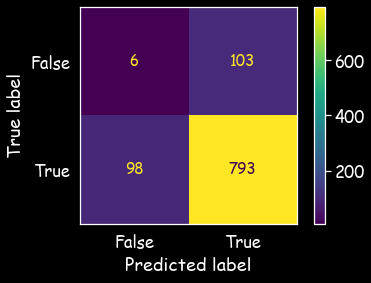

In [13]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [14]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
F1_score = metrics.f1_score(actual, predicted)

In [15]:
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Precision': 0.8850446428571429, 'Sensitivity_recall': 0.8900112233445566, 'F1_score': 0.8875209848908786}
